In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from DecisionTreeRegressor import DecisionTreeRegressor as MyDecisionTreeRegressor

%matplotlib inline

In [2]:
boston = load_boston()
X = boston.data
y = boston.target

In [3]:
df = pd.DataFrame(data=[X[:,0], X[:,0]])
X2 = np.array(df.transpose())

In [4]:
DTR = DecisionTreeRegressor(max_depth=1)

In [5]:
DTR.fit(X2, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [6]:
y_hat = DTR.predict(X2)
np.unique(y_hat)

array([ 13.74597701,  24.35727924])

In [7]:
DTR.score(X2, y)

0.18990069119814468

In [8]:
myDTR = MyDecisionTreeRegressor()

In [9]:
myDTR.fit(X2, y, max_depth=1)

In [10]:
my_hat = myDTR.predict(X2)
np.unique(my_hat)

array([ 13.74597701,  24.35727924])

In [11]:
myDTR.score(X2, y)

0.18990069119814468

In [12]:
print(X2.min())
print(X2.max())

0.00632
88.9762


In [13]:
X_exp = np.array(pd.DataFrame(data=[np.linspace(0, 90, 1000), np.linspace(0, 90, 1000)])).reshape((1000,2))

In [14]:
y_exp = DTR.predict(X_exp)

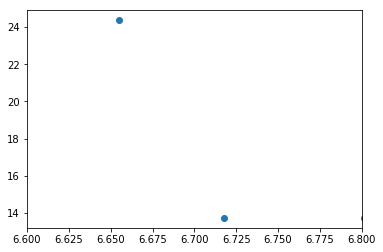

In [15]:
plt.scatter(X2[:,0], y_hat)
plt.xlim(6.6, 6.8);

(0.095, 0.11)

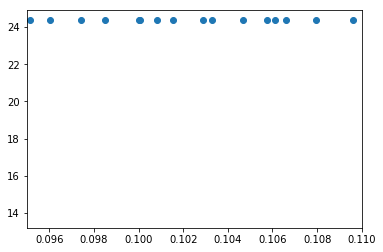

In [16]:
plt.scatter(X2[:,0], my_hat)
plt.xlim(0.095, 0.11)

In [17]:
sum(X[:,0] > 6.70)

87

In [18]:
sum(X[:,0] > 0.1008)

352

In [19]:
min_x = []
min_error = []

for k, v in myDTR.metrics.items():
    min_x.append(k)
    min_error.append(v[0])

print(min_x[np.argmin(min_error)])
print(np.min(min_error))

6.65492
68.3882240915


In [20]:
np.argmin(y)

398

In [21]:
min_x = []
min_error = []

for k, v in myDTR.metrics.items():
    min_x.append(k)
    min_error.append(v[3])

print(min_x[np.argmax(min_error)])
print(np.max(min_error))

6.65492
0.189900691198


In [22]:
mean_squared_error(y, y_hat)

68.388224091469127

In [23]:
mean_squared_error(y, my_hat)

68.388224091469127

In [24]:
Xmb = X[:,0] <= 6.7
Xma = X[:,0] > 6.7

In [25]:
np.mean(y[Xmb])

24.357279236276852

In [26]:
np.mean(y[Xma])

13.745977011494251

In [27]:
all(Xmb == np.invert(Xma))

True

In [28]:
Xmb = X[:,0] <= 0.02818
Xma = X[:,0] > 0.02817

In [29]:
np.mean(y[Xmb])

31.123076923076926

In [30]:
np.mean(y[Xma])

22.067499999999999

In [31]:
for k, v in myDTR.metrics.items():
    if k > 6.625 and k < 6.75:
        print(v)

(68.388224091469127, 0.18990069119814468, 68.388224091469127, 0.18990069119814468)
(68.624696452098632, 0.1870995350277419, 68.624696452098632, 0.1870995350277419)
